In [1]:
### Import libraries
import pandas as pd # primary data structure library
import numpy as np # useful for many scientific computing in Python
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches # needed for waffle Charts
import matplotlib.colors as mcolors
import seaborn as sns
import plotly.express as px
import random
import math
import time
import datetime
from PIL import Image # converting images into arrays
import matplotlib.patches as mpatches # needed for waffle Charts
import folium # to create maps
from pylab import *
%matplotlib inline
import warnings
mpl.style.use('seaborn') # optional: for ggplot-like style
warnings.filterwarnings("ignore")

C:\Users\loicb\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Dataset

This data is collected from repository for the 2019 Novel Coronavirus Visual Dashboard operated by the Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE).https://github.com/CSSEGISandData/COVID-19

In [2]:
### Select yesterday date as report provide figures for the day before
from datetime import date, timedelta
file_date = str((date.today() - timedelta(days = 1)).strftime('%m-%d-%Y'))
### Select data path
github_dir_path = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/'
file_path = github_dir_path  + file_date + '.csv'
### Import data
df = pd.read_csv(file_path, error_bad_lines=False)

In [3]:
# view the dataframe
df.head()

FIPS Admin2 Province_State Country_Region          Last_Update       Lat  \
0   NaN    NaN            NaN    Afghanistan  2020-09-06 04:28:33  33.93911   
1   NaN    NaN            NaN        Albania  2020-09-06 04:28:33  41.15330   
2   NaN    NaN            NaN        Algeria  2020-09-06 04:28:33  28.03390   
3   NaN    NaN            NaN        Andorra  2020-09-06 04:28:33  42.50630   
4   NaN    NaN            NaN         Angola  2020-09-06 04:28:33 -11.20270   

       Long_  Confirmed  Deaths  Recovered   Active Combined_Key  \
0  67.709953      38324    1409      30082   6833.0  Afghanistan   
1  20.168300      10102     312       5976   3814.0      Albania   
2   1.659600      46071    1549      32481  12041.0      Algeria   
3   1.521800       1215      53        928    234.0      Andorra   
4  17.873900       2935     117       1192   1626.0       Angola   

   Incidence_Rate  Case-Fatality_Ratio  
0       98.447555             3.676547  
1      351.032038             3.088497  
2      105.062495             3.362202  
3     1572.510192             4.362140  
4        8.930129             3.986371

In [4]:
# Countries affected
countries = df['Country_Region'].unique().tolist()
print("\nTotal countries affected by virus: ",len(countries))
print(countries)


Total countries affected by virus:  188
['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Holy See', 'Honduras'

In [5]:
print ('data dimensions:', df.shape)

data dimensions: (3954, 14)


In [6]:
### Check if the dataframe contains NaN values
df.isna().any()

FIPS                    True
Admin2                  True
Province_State          True
Country_Region         False
Last_Update            False
Lat                     True
Long_                   True
Confirmed              False
Deaths                 False
Recovered              False
Active                  True
Combined_Key           False
Incidence_Rate          True
Case-Fatality_Ratio     True
dtype: bool

In [7]:
### Replace NaN values by 0
df.fillna(0, inplace=True)
# Remove columns
df_countries = df.drop(['FIPS','Lat','Long_','Admin2','Province_State','Last_Update','Combined_Key'], axis=1)
# Rename the columns so that they make sense
df_countries.rename (columns = {'Country_Region':'Country'}, inplace = True)
# Re-order Columns
df_countries = df_countries[['Country','Confirmed','Active','Recovered','Deaths']]
# Group datas by Country
df_countries_grouped=df_countries.groupby('Country').sum()
# Set the country name as index
df_countries.set_index('Country', inplace=True)

In [8]:
print ('data dimensions:', df_countries_grouped.shape)

data dimensions: (188, 4)


In [9]:
# view the final dataframe
df_countries_grouped.head()

Confirmed   Active  Recovered  Deaths
Country                                           
Afghanistan      38324   6833.0      30082    1409
Albania          10102   3814.0       5976     312
Algeria          46071  12041.0      32481    1549
Andorra           1215    234.0        928      53
Angola            2935   1626.0       1192     117

In [10]:
# plotting configurations
%config InlineBackend.figure_format = 'retina'
plt.rc('figure', dpi=300)
plt.rc('savefig', dpi=300)
fig_size = (12,6)
big_fig_size = (18,8)

In [33]:
fig = px.treemap(df.sort_values(by='Active', ascending=False).reset_index(drop=True), 
                 path=["Country_Region"], values="Active", 
                 title='Number of Active Cases')
fig.show()

In [34]:
fig = px.treemap(df.sort_values(by='Deaths', ascending=False).reset_index(drop=True), 
                 path=["Country_Region"], values="Deaths", 
                 title='Number of Deaths Cases')
fig.show()

In [15]:
world_cases = []
total_active = []
total_recovered = [] 
total_deaths = [] 
recovery_rate = [] 
mortality_rate = []

confirmed_sum = df.Confirmed.sum()
active_sum=df.Active.sum()
recovered_sum = df.Recovered.sum()
death_sum = df.Deaths.sum()
world_cases.append(confirmed_sum)
total_active.append(active_sum)
total_recovered.append(recovered_sum)
total_deaths.append(death_sum)
recovery_rate.append(recovered_sum/confirmed_sum)
mortality_rate.append(death_sum/confirmed_sum)
mean_mortality_rate = np.mean(mortality_rate)
mean_recovery_rate = np.mean(recovery_rate)

In [16]:
print ('Total Confirmed Cases= '+ str(confirmed_sum))
print ('Total Active Cases= '+ str(active_sum))
print ('Total Recovered Cases= '+ str(recovered_sum))
print ('Total Deaths Cases= '+ str(death_sum))
print ('Total Recovery Rate(%)= '+ str(mean_recovery_rate*100))
print ('Total Fatality Rate(%)= '+ str(mean_mortality_rate*100))

Total Confirmed Cases= 26873146
Total Active Cases= 8076196.0
Total Recovered Cases= 17917644
Total Deaths Cases= 879307
Total Recovery Rate(%)= 66.67490289376614
Total Fatality Rate(%)= 3.2720657268784237


In [17]:
### Show Countries with most Active cases
df_countries_grouped = df_countries_grouped.sort_values('Confirmed', ascending=False)
df_countries_grouped.head(10).style.background_gradient(cmap='Blues')

In [18]:
### Show Countries with most Active cases
df_countries_grouped = df_countries_grouped.sort_values('Active', ascending=False)
df_countries_grouped.head(10).style.background_gradient(cmap='Blues')

In [19]:
### Show Countries with most Recovered cases
df_countries_grouped = df_countries_grouped.sort_values('Recovered', ascending=False)
df_countries_grouped.head(10).style.background_gradient(cmap='Blues')

In [20]:
### Show Countries with most Deaths cases
df_countries_grouped = df_countries_grouped.sort_values('Deaths', ascending=False)
df_countries_grouped.head(10).style.background_gradient(cmap='Blues')

In [21]:
### Show Countries with no Deaths cases
df_countries_grouped = df_countries_grouped.sort_values('Deaths', ascending=False)
df_countries_grouped.tail(10).style.background_gradient(cmap='Blues')

In [22]:
### Show Countries with no Recovered cases
df_countries_grouped = df_countries_grouped.sort_values('Recovered', ascending=False)
df_countries_grouped.tail(10).style.background_gradient(cmap='Blues')

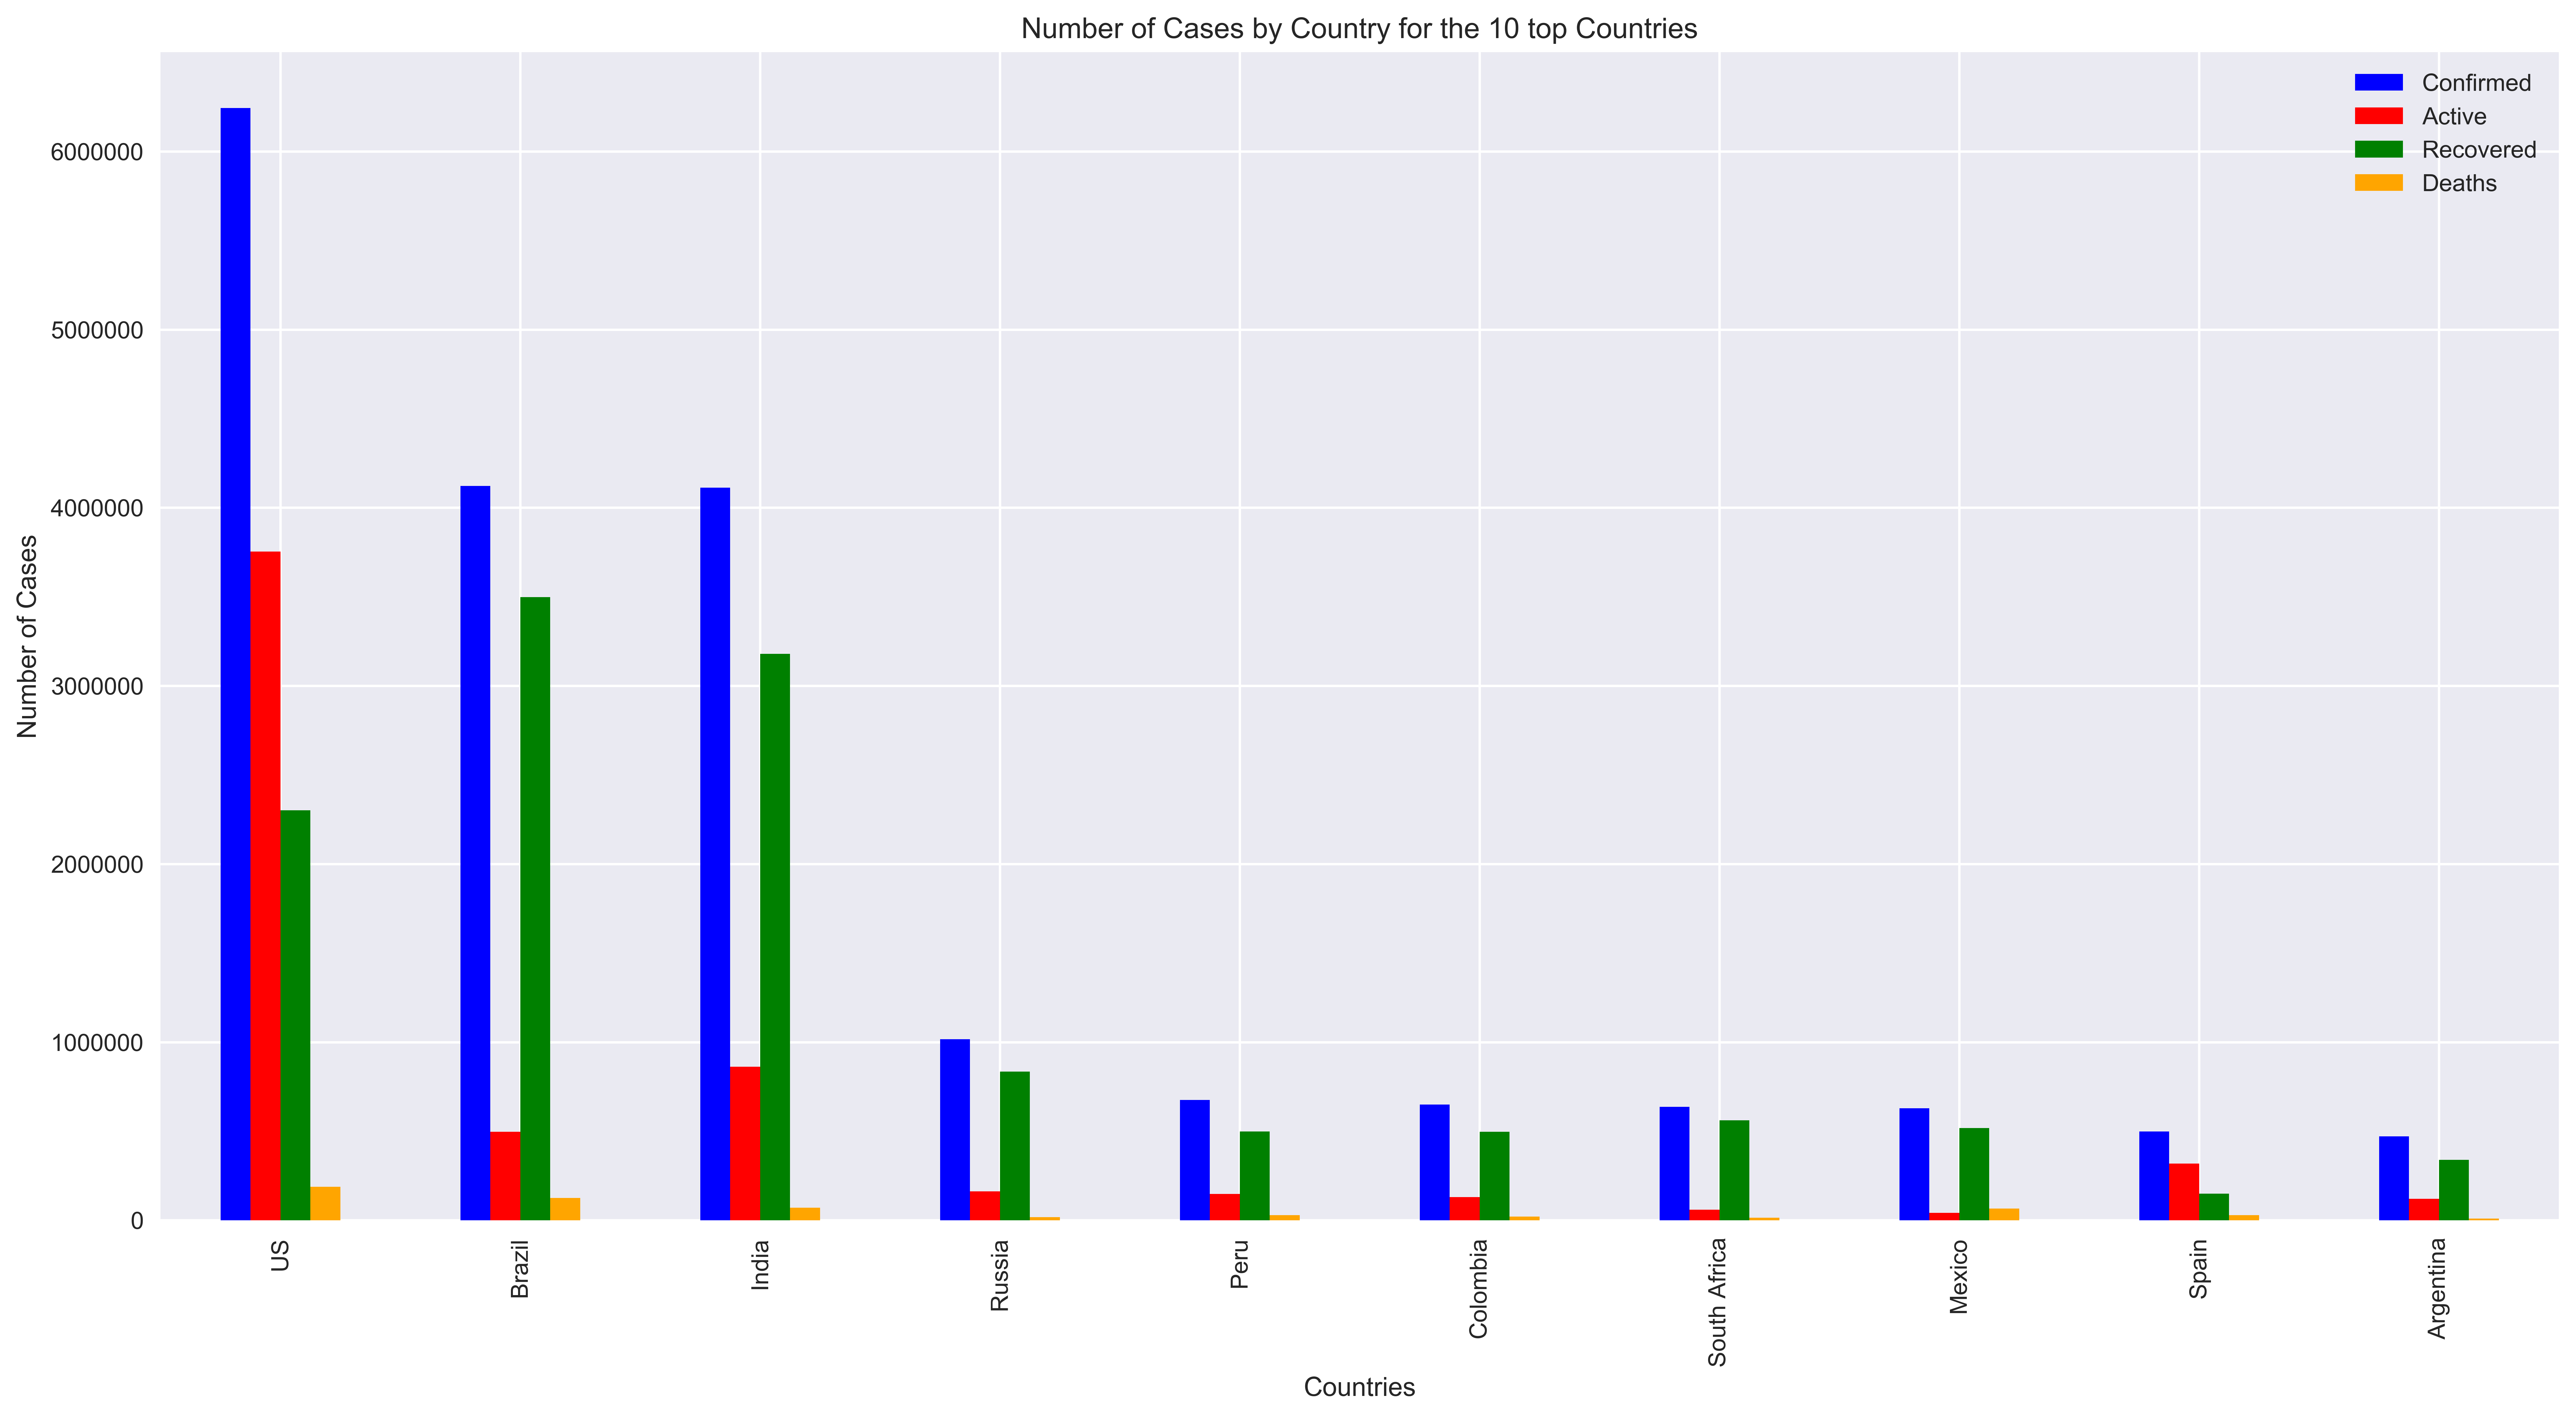

In [23]:
### Sort the top countries by Confirmed cases
df_countries_grouped.sort_values(['Confirmed'], ascending=False, axis=0, inplace=True)
# get the top entries
df_countries_top = df_countries_grouped.head(10)
### Show Unstacked Histogram
df_countries_top.plot(kind='bar', figsize=(18, 9), stacked=False, 
            color=['blue', 'red', 'green', 'orange'])
plt.title('Number of Cases by Country for the 10 top Countries')
plt.ylabel('Number of Cases')
plt.xlabel('Countries')
plt.show()

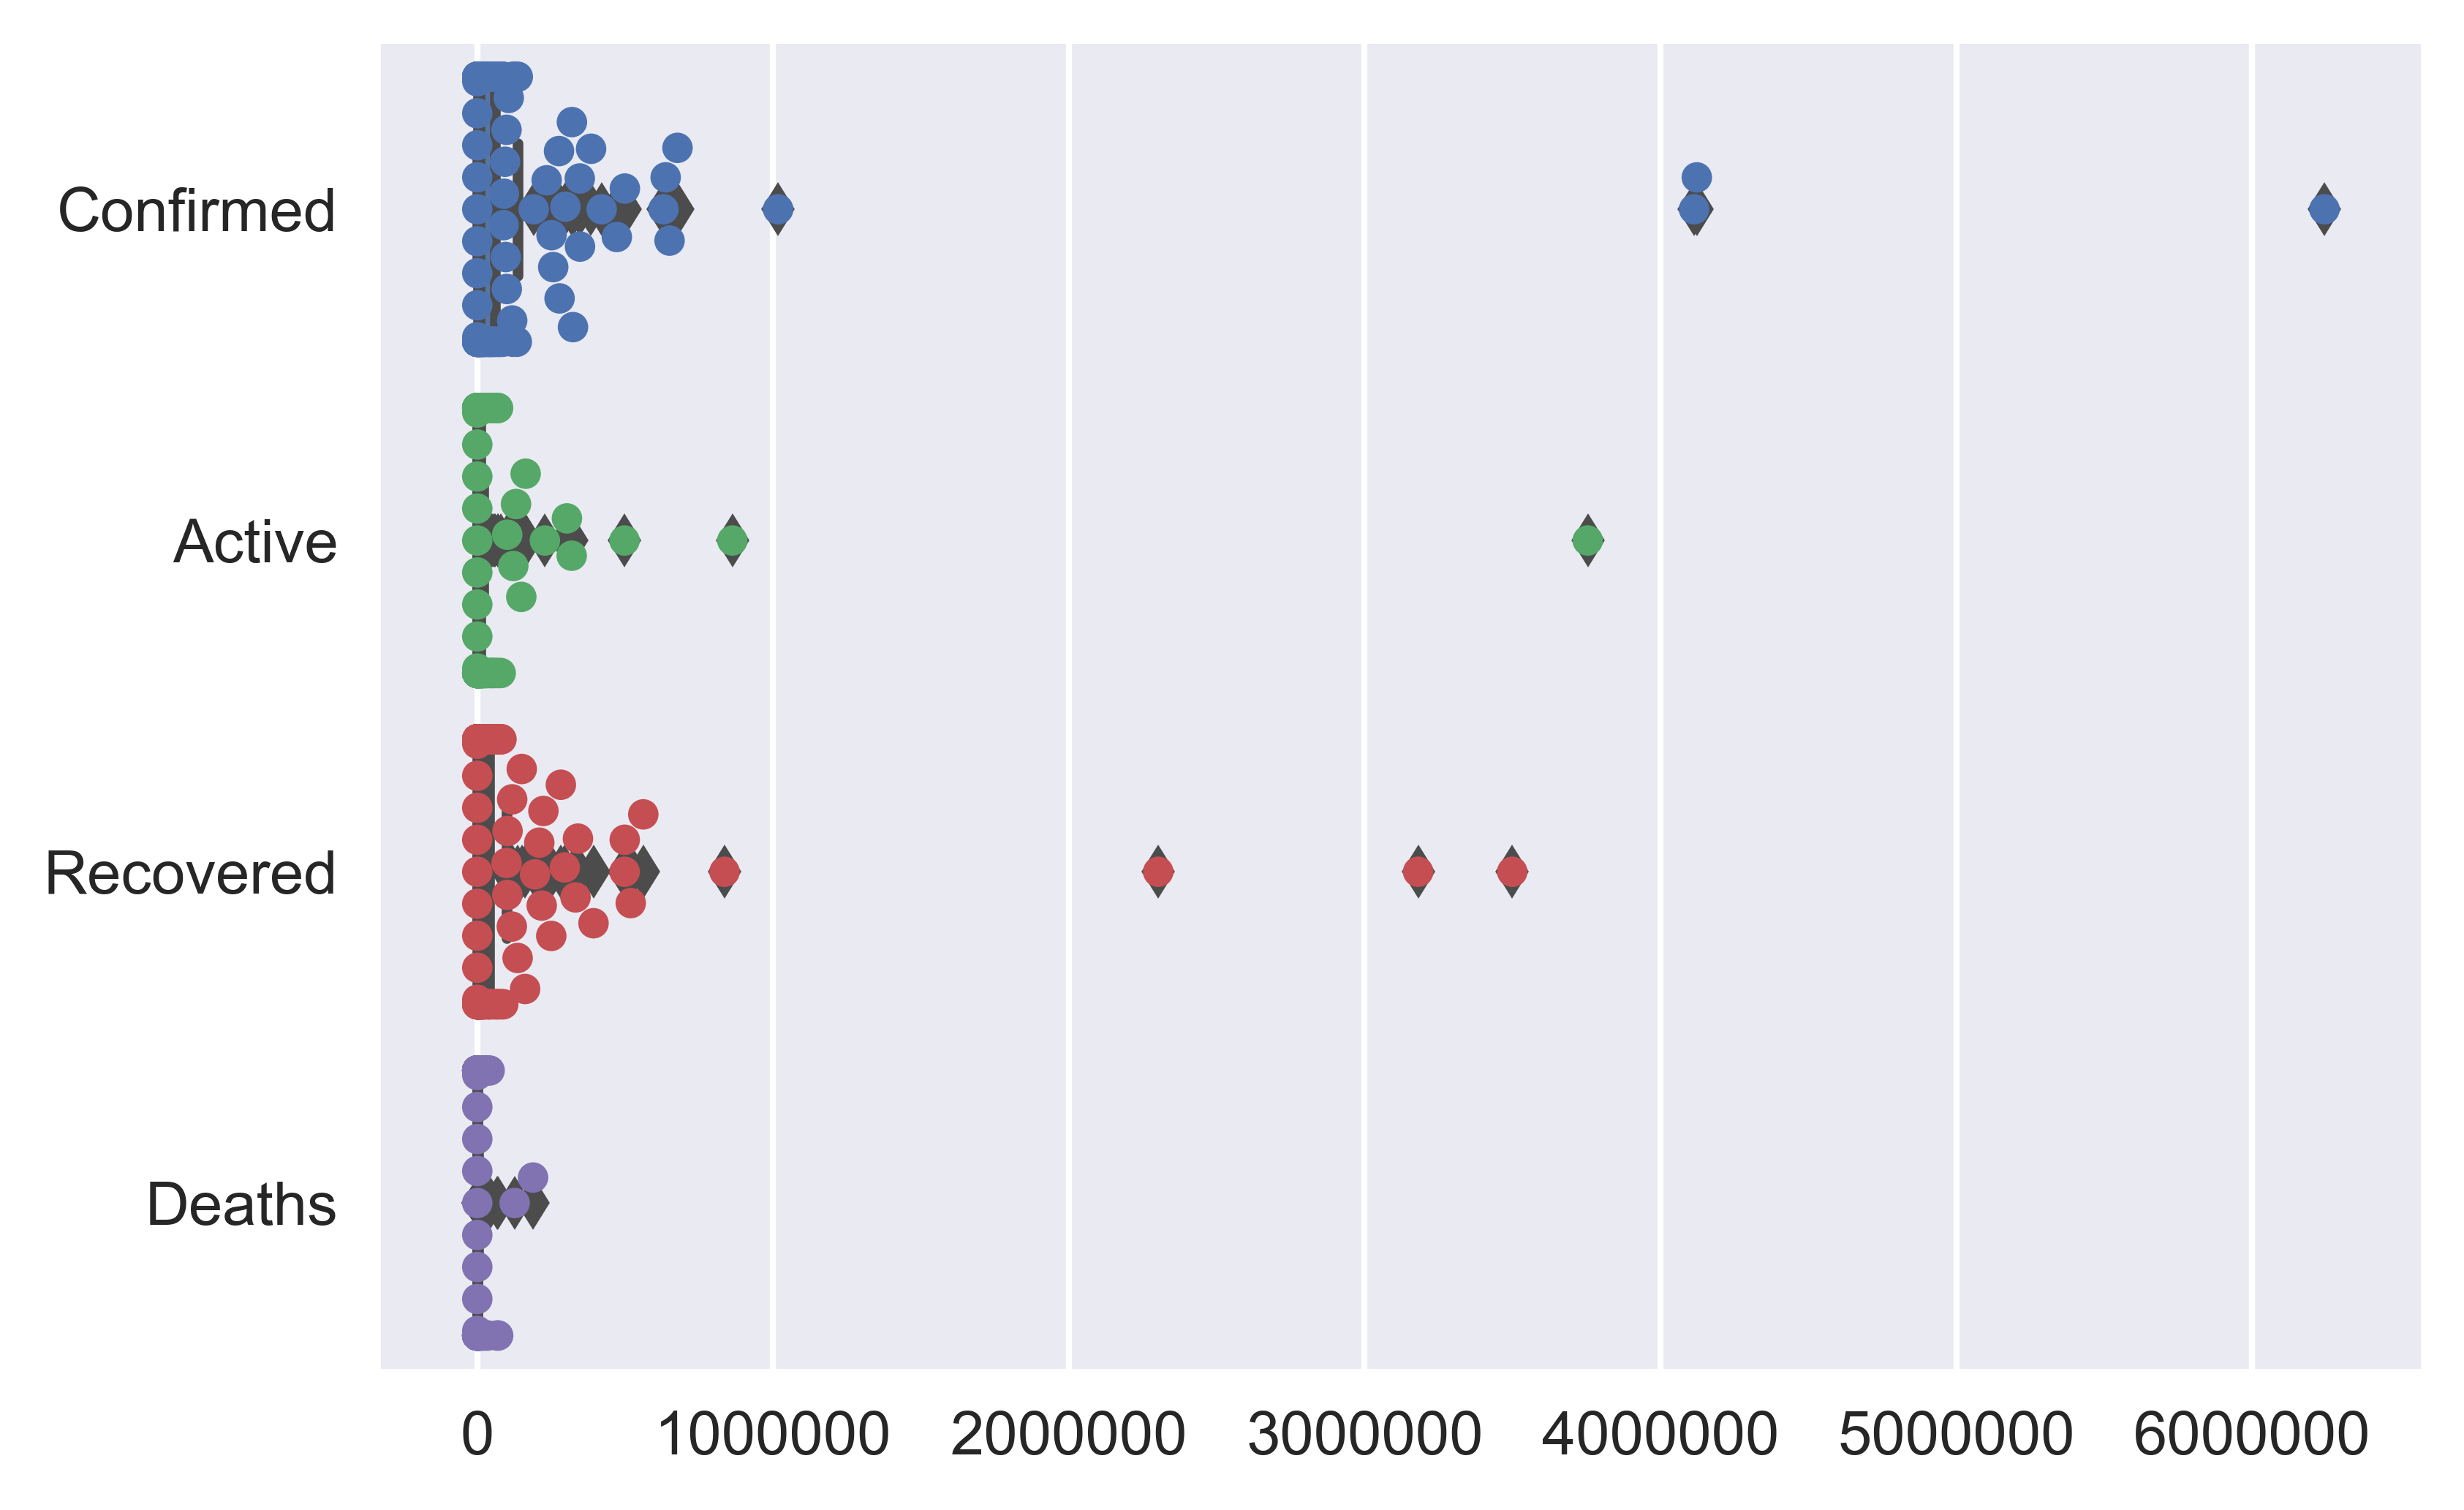

In [24]:
ax = sns.boxplot(data=df_countries_grouped, orient="h")
ax = sns.swarmplot(data=df_countries_grouped, orient="h")

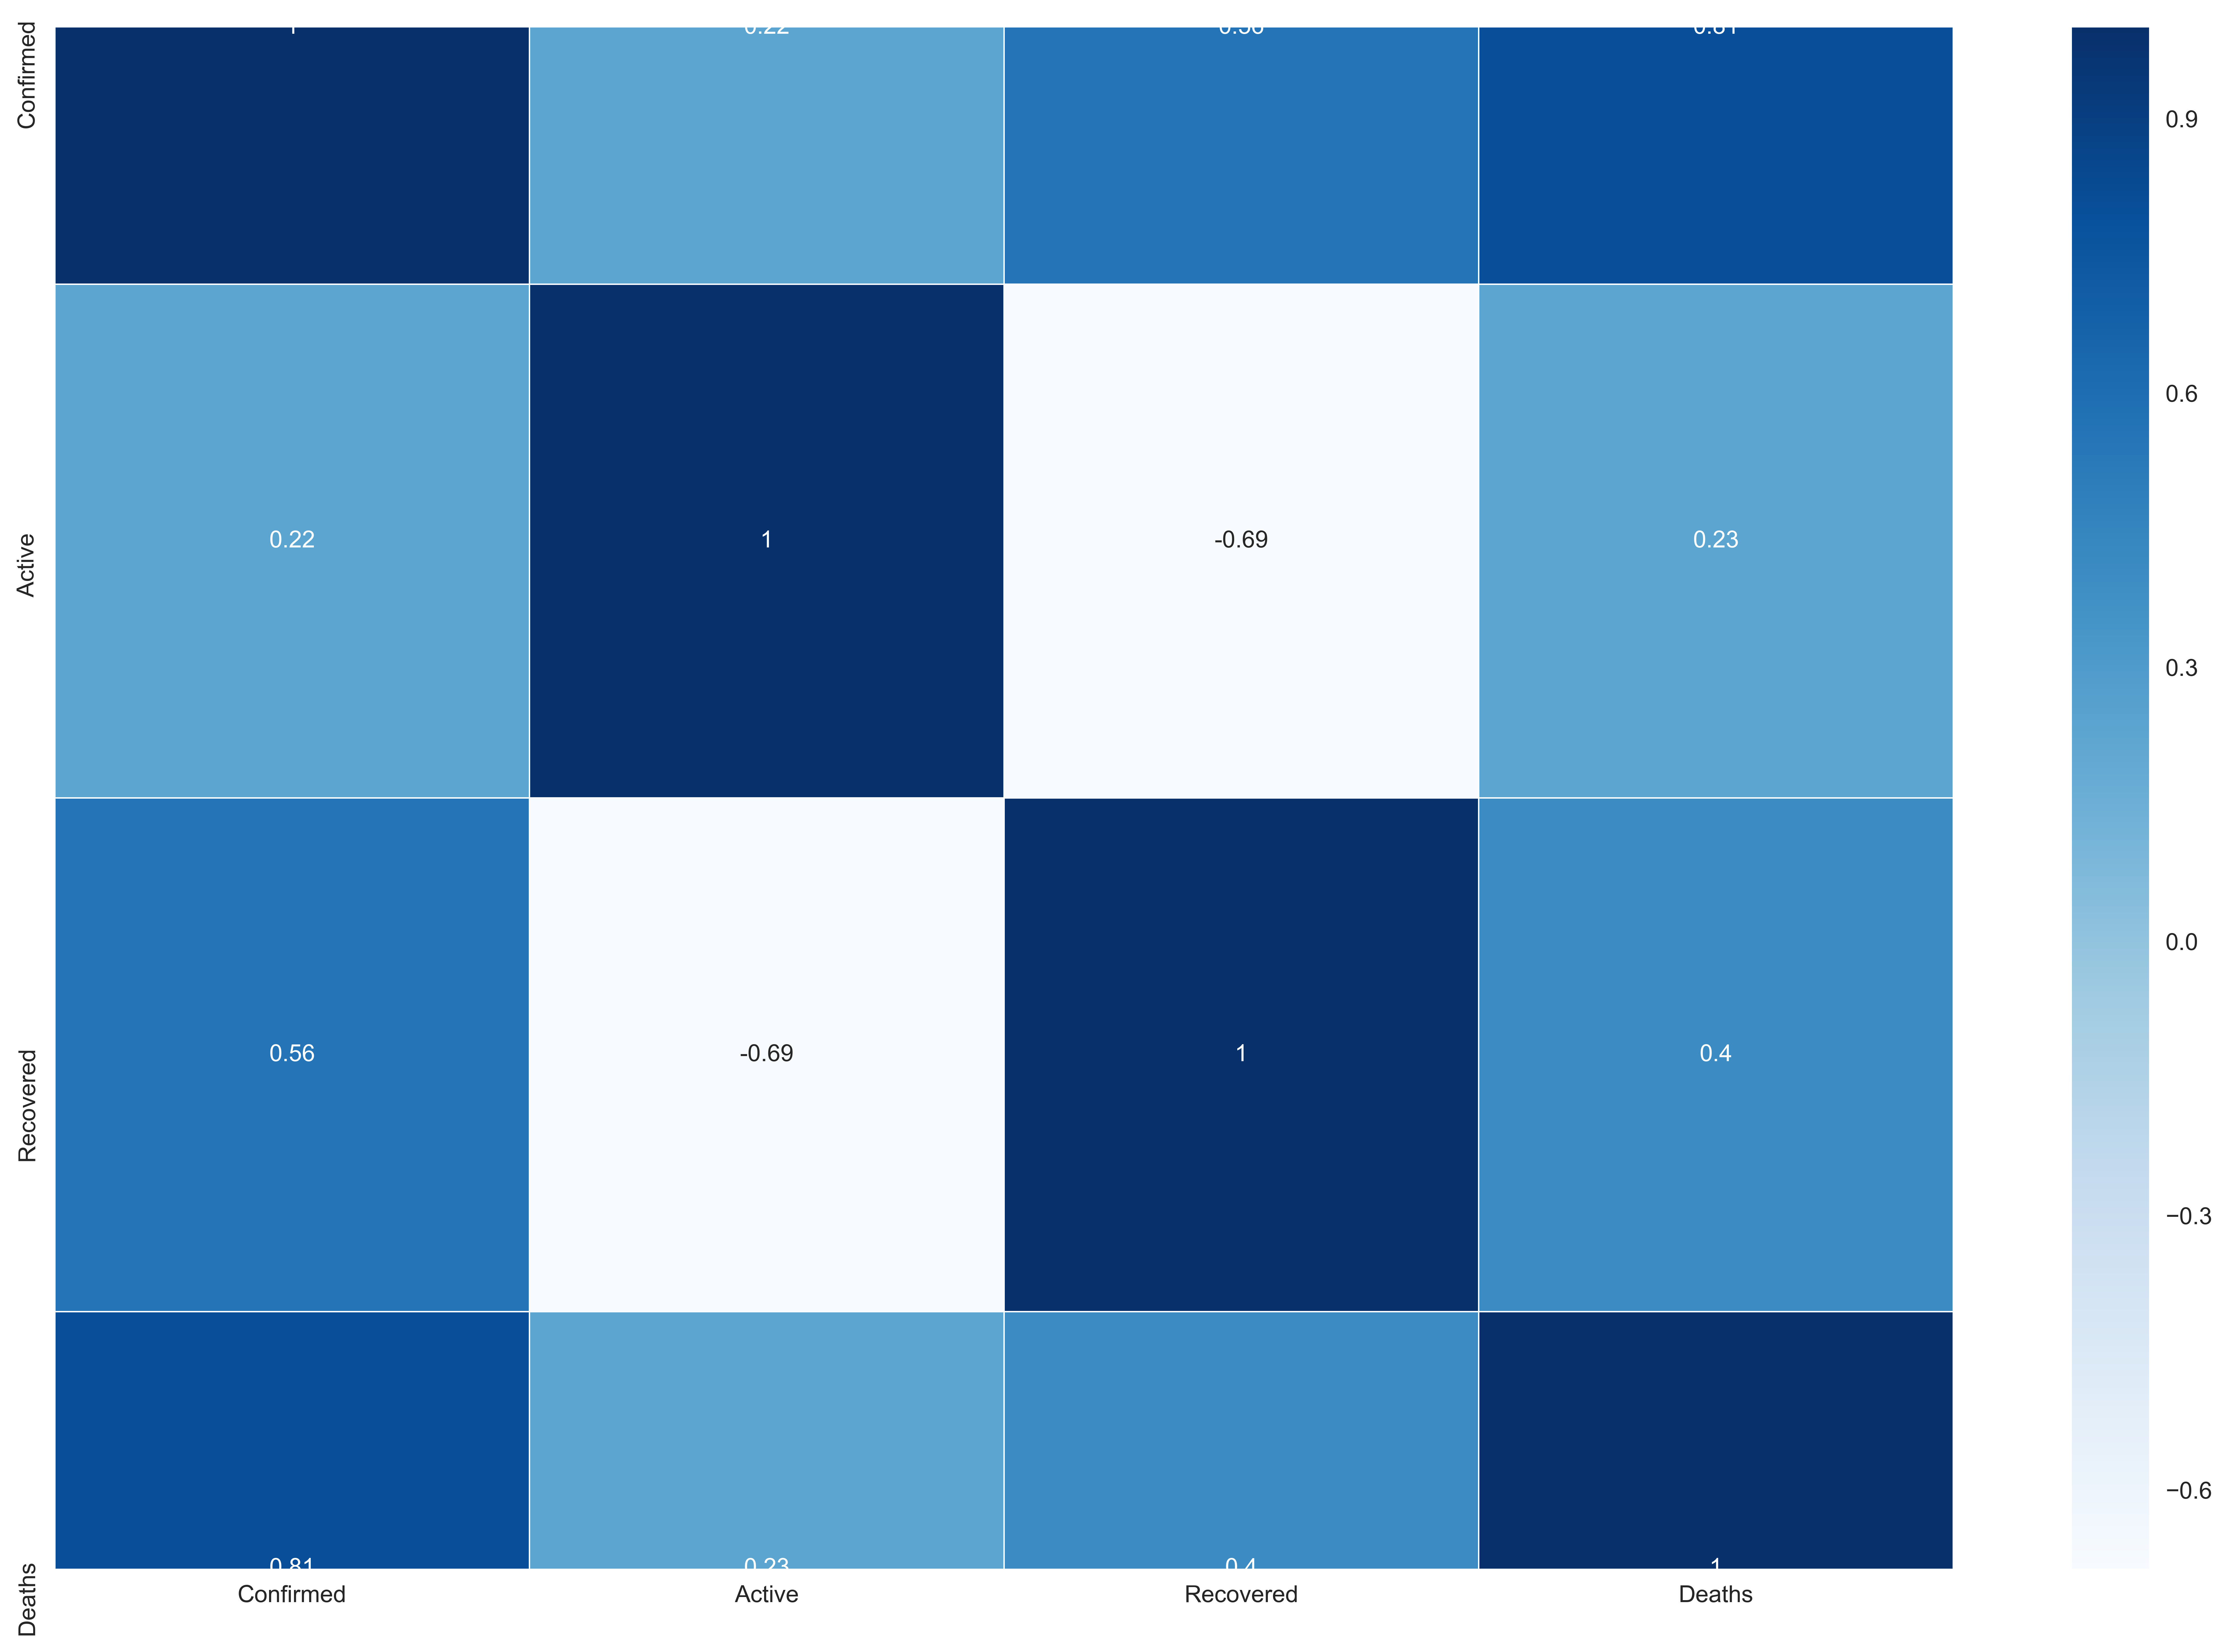

In [25]:
### Show heatmap Correlation 
ax = plt.subplots(figsize=(18, 12))
sns.heatmap(df_countries.corr(), annot=True, linewidths=.5, cmap="Blues")

In [26]:
sns.pairplot(df_countries_grouped[['Confirmed','Deaths','Recovered','Active']], diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'}, palette="husl",
             size = 4);

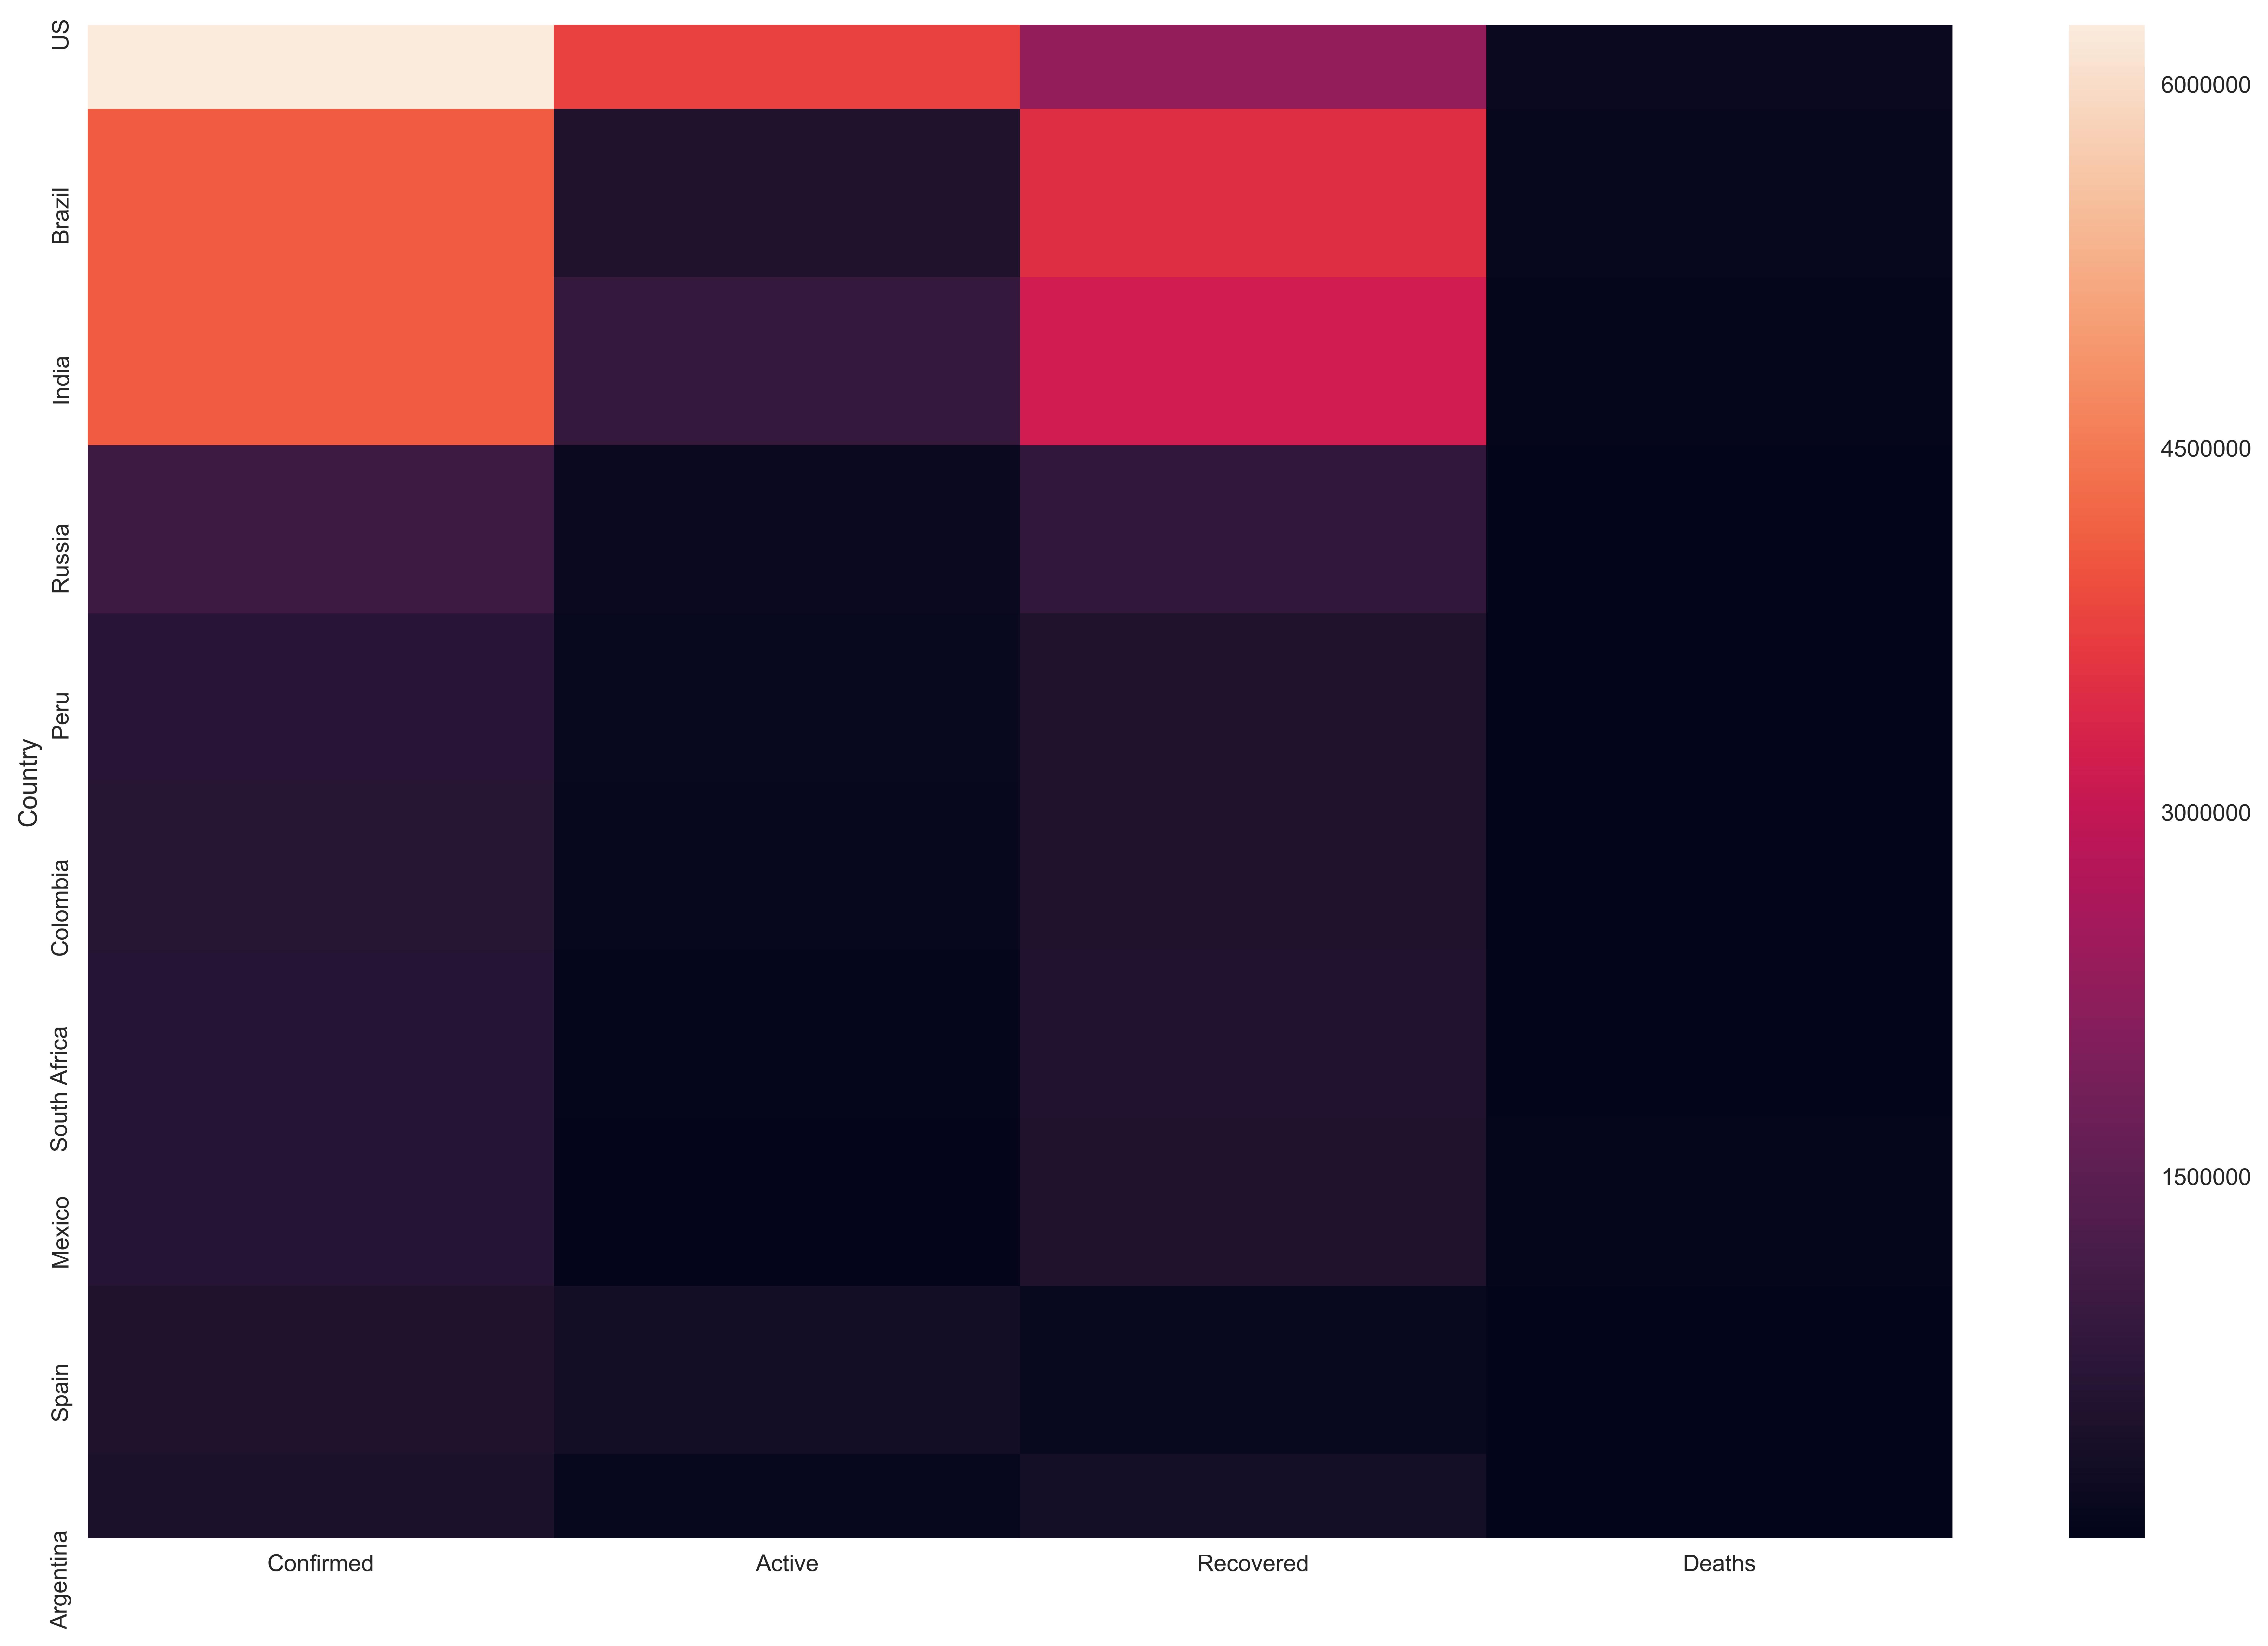

In [27]:
### Show heatmap
sns.set_style("darkgrid")
ax = plt.subplots(figsize=(18, 12))
sns.heatmap(df_countries_top)

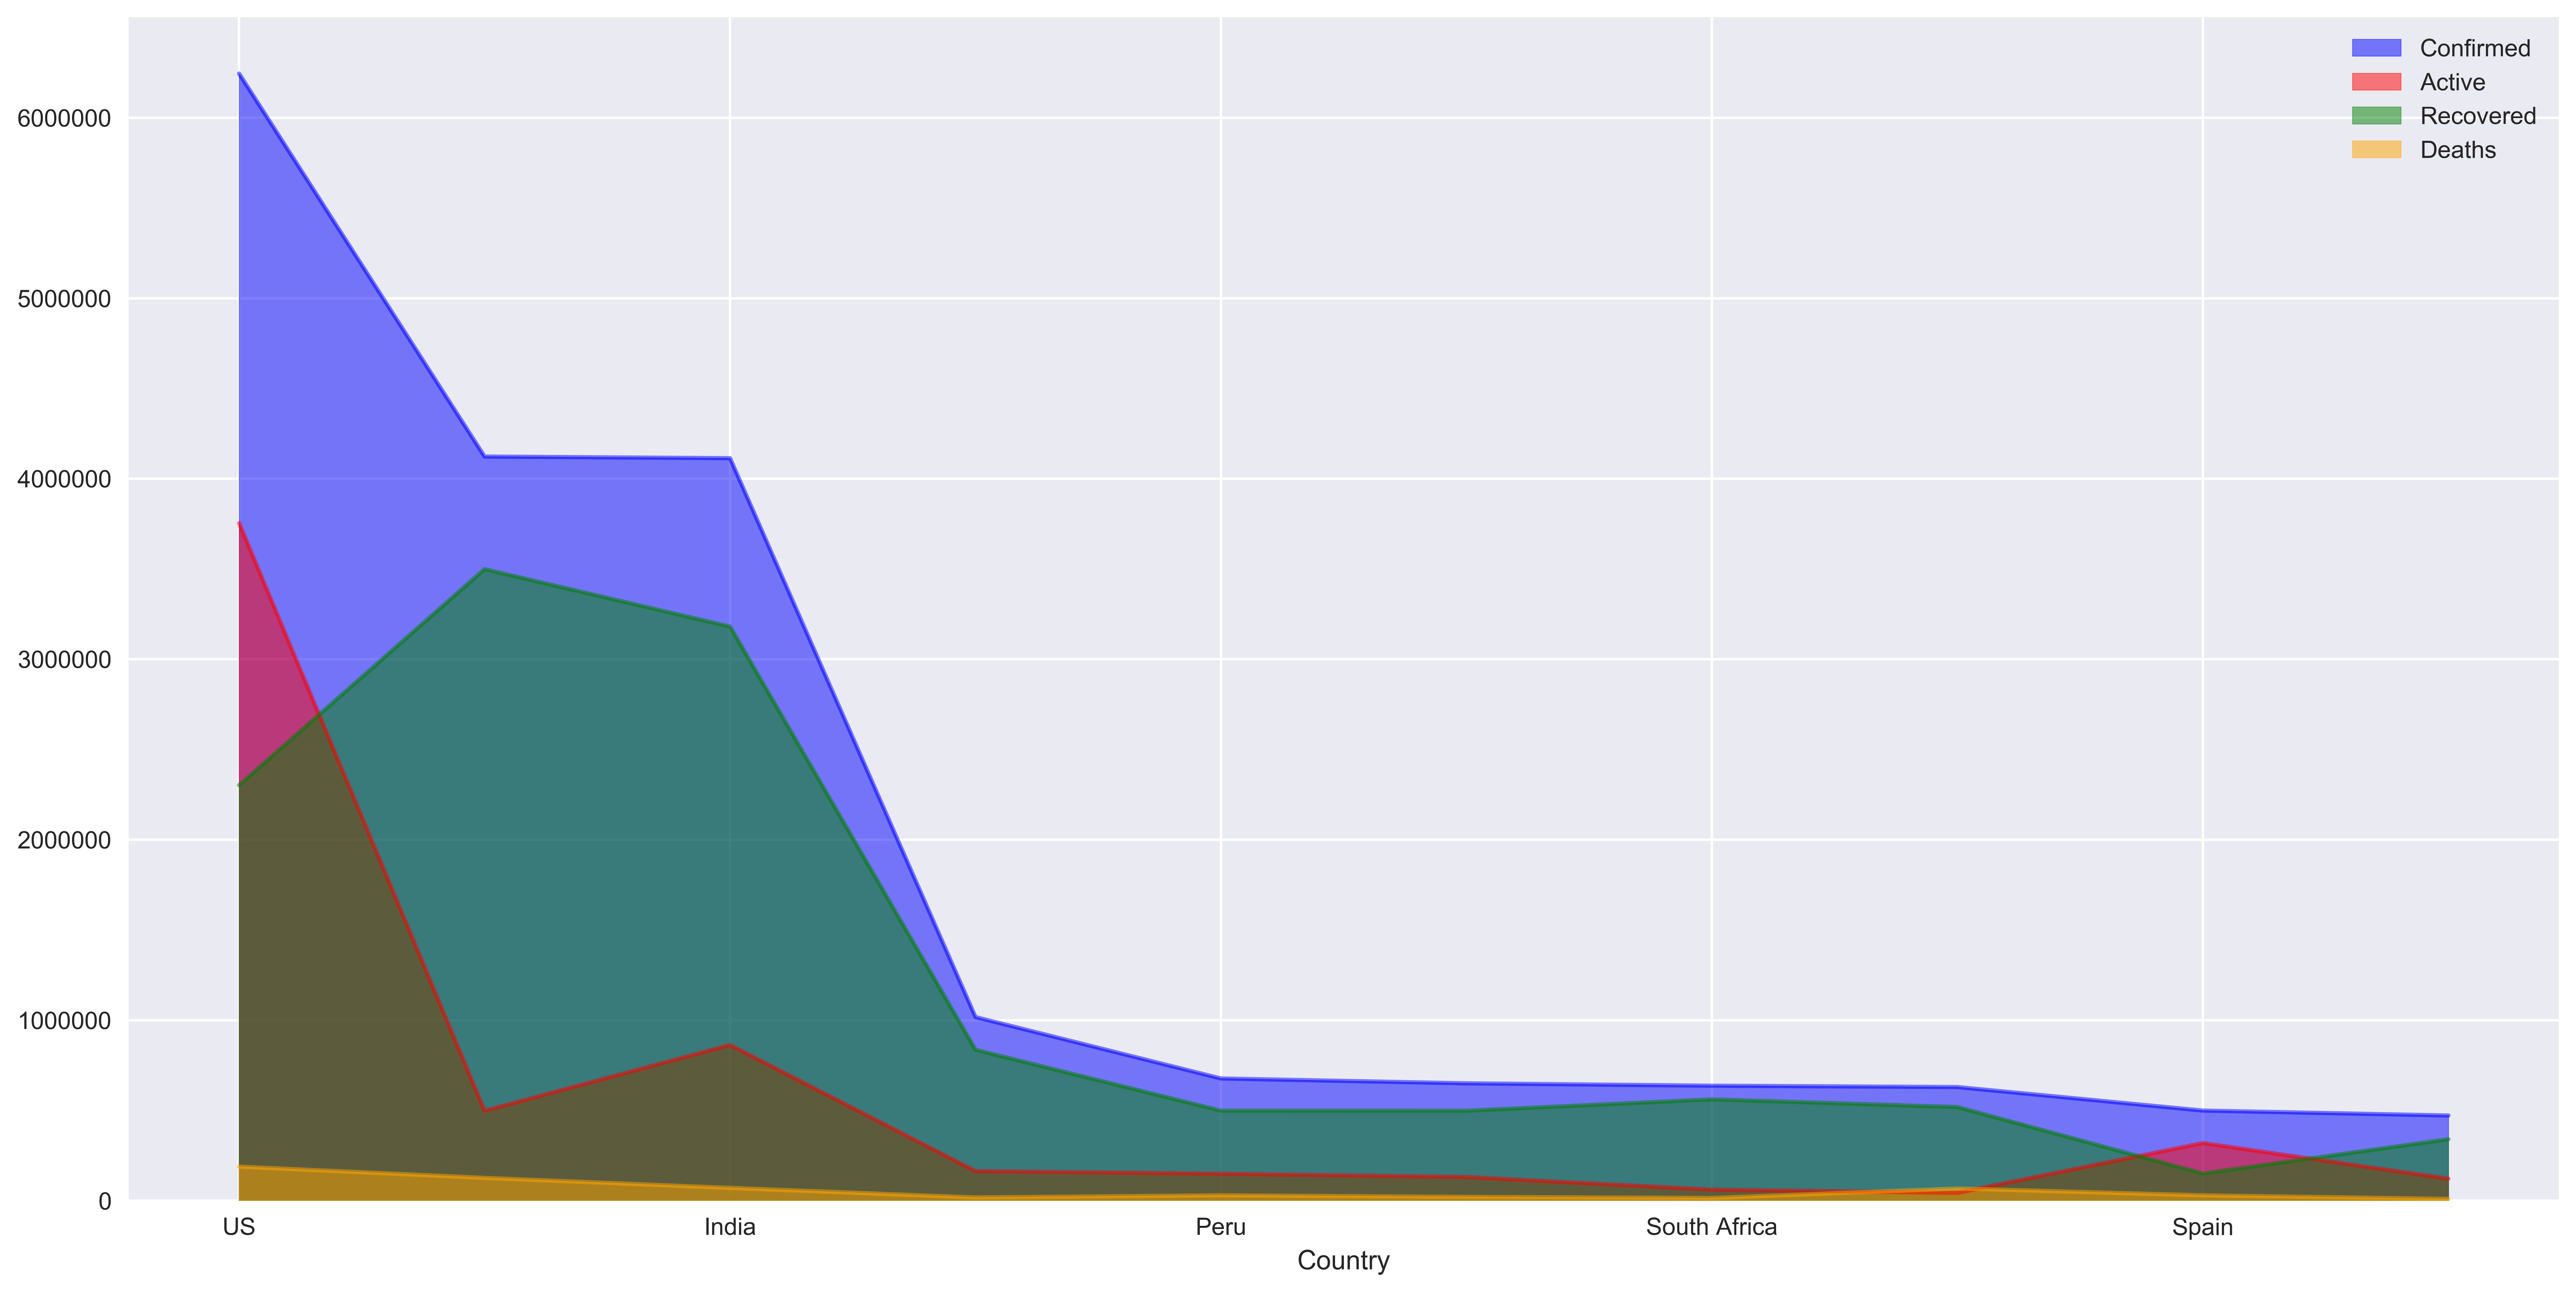

In [28]:
# Line plot top 8 countries
df_countries_top.plot(kind='area', figsize=(18, 9),stacked=False, 
            color=['blue', 'red', 'green', 'orange']) 
plt.show()

In [29]:
df_countries_top = df_countries_top.reset_index()

In [30]:
sns.pairplot(df_countries_top, 
             vars = ['Confirmed', 'Active', 'Recovered', 'Deaths'], 
             hue = 'Country', diag_kind = 'kde', palette="husl",
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4);

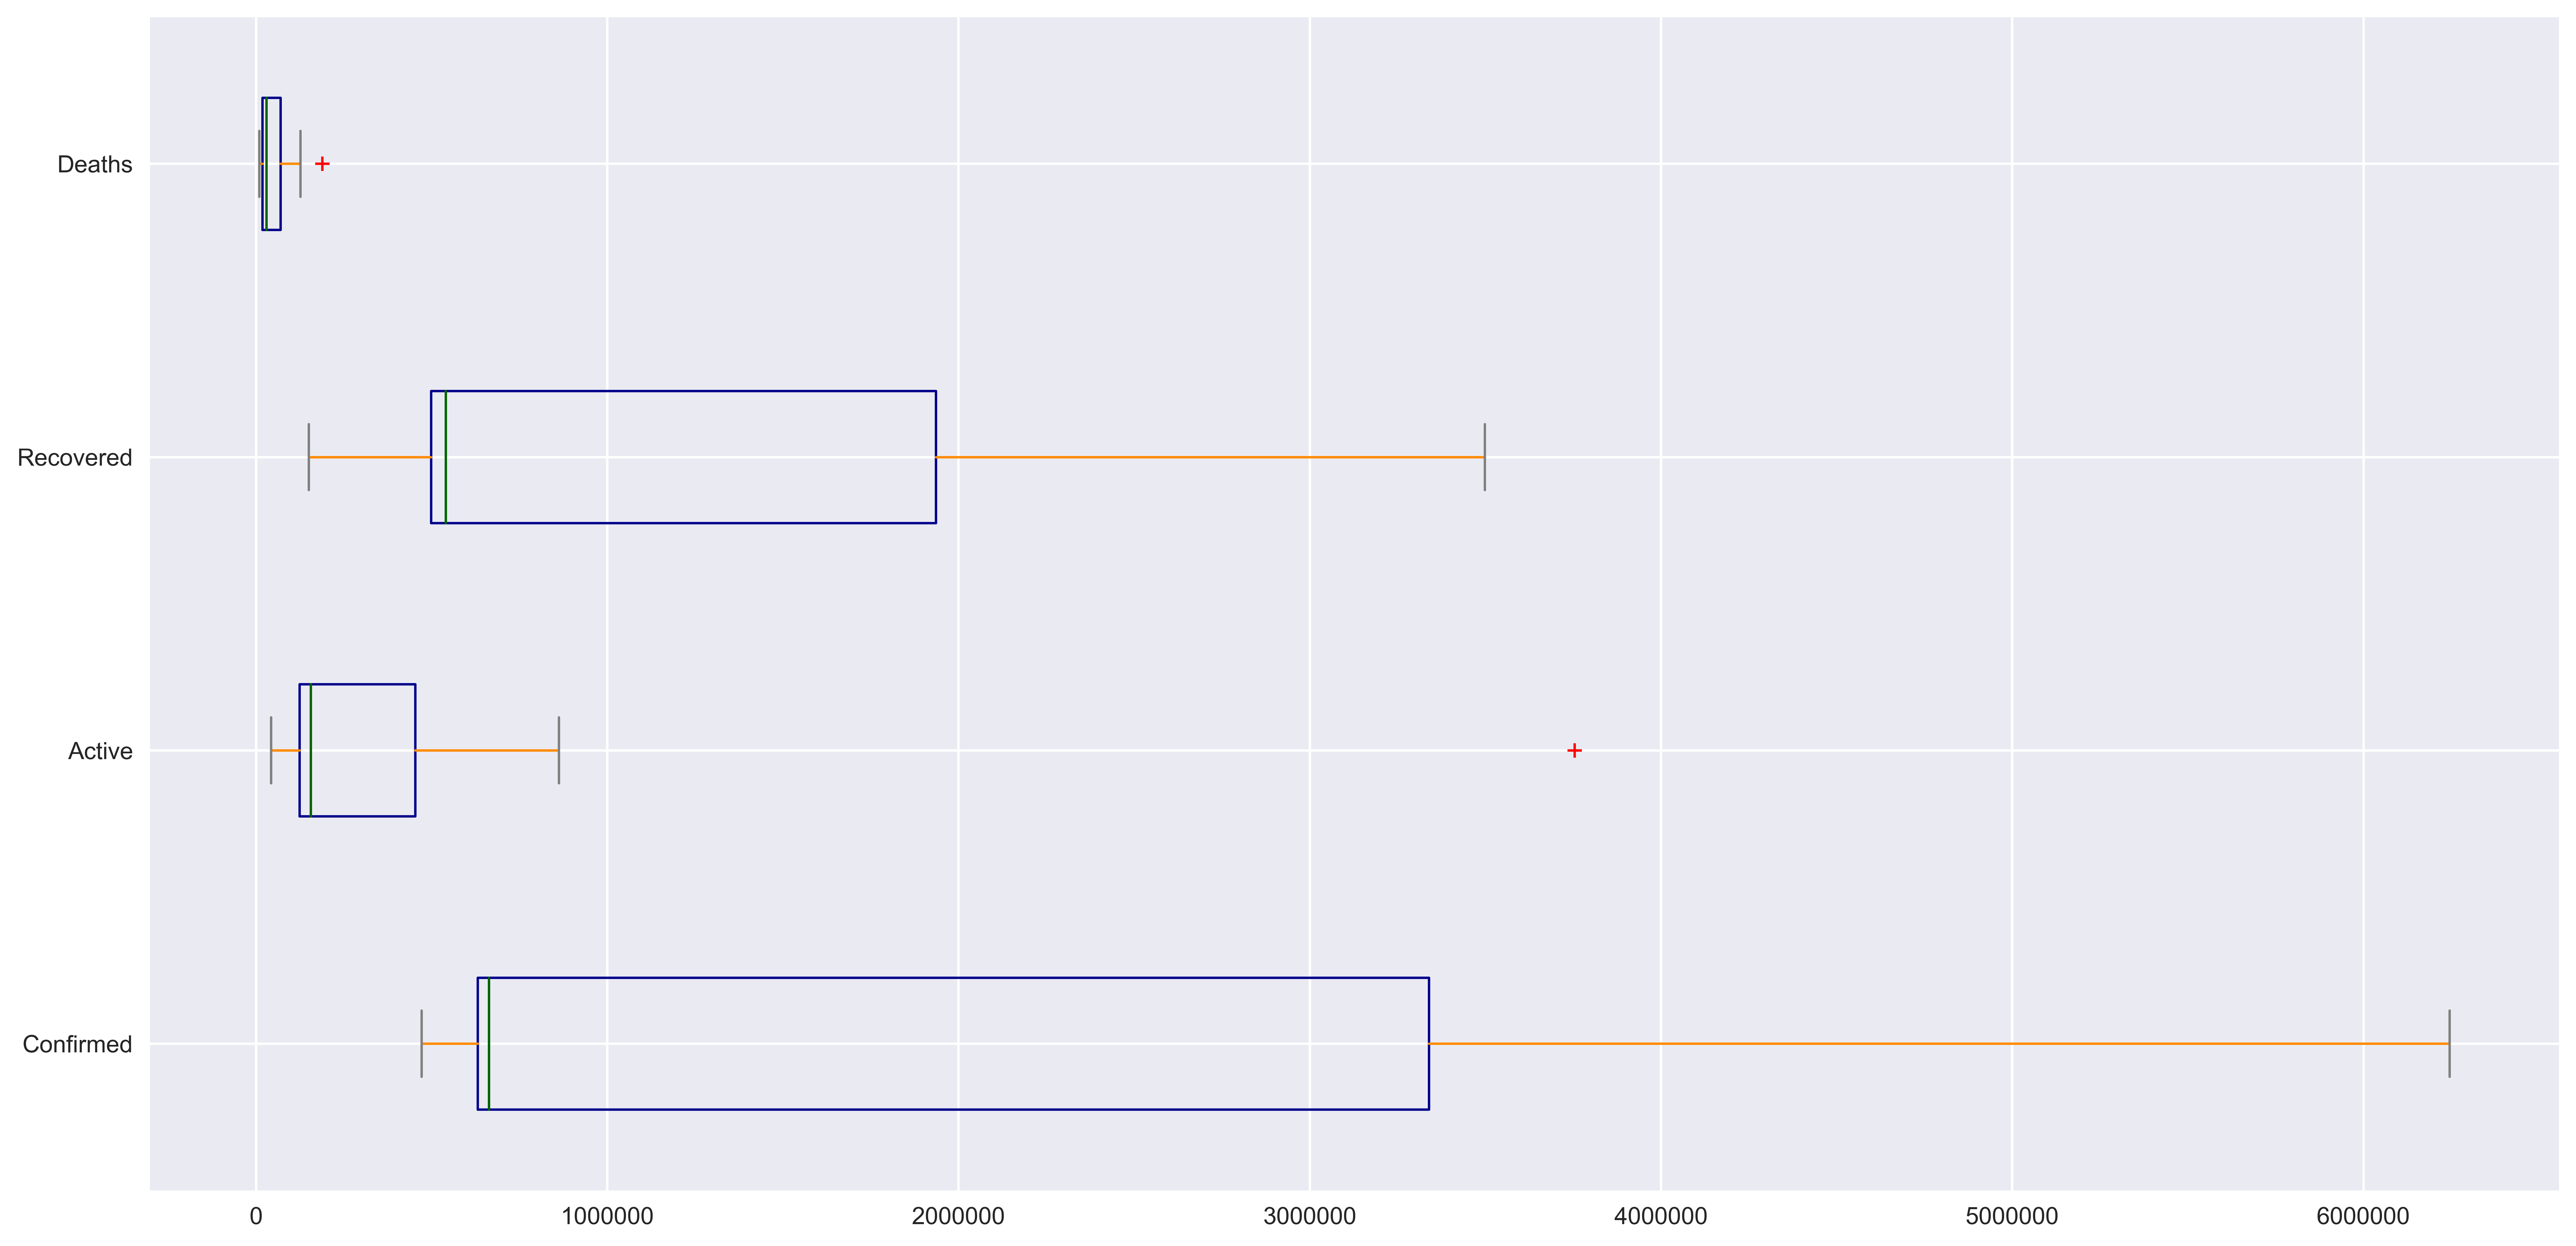

In [31]:
### Show Box plot
color = dict(boxes='DarkBlue', whiskers='DarkOrange',medians='DarkGreen', caps='Gray')
df_countries_top.plot(kind ='box',notch= False,
          color=color, sym='r+', vert=False ,patch_artist=False,
          figsize=(18, 9))
plt.title('')
plt.show()

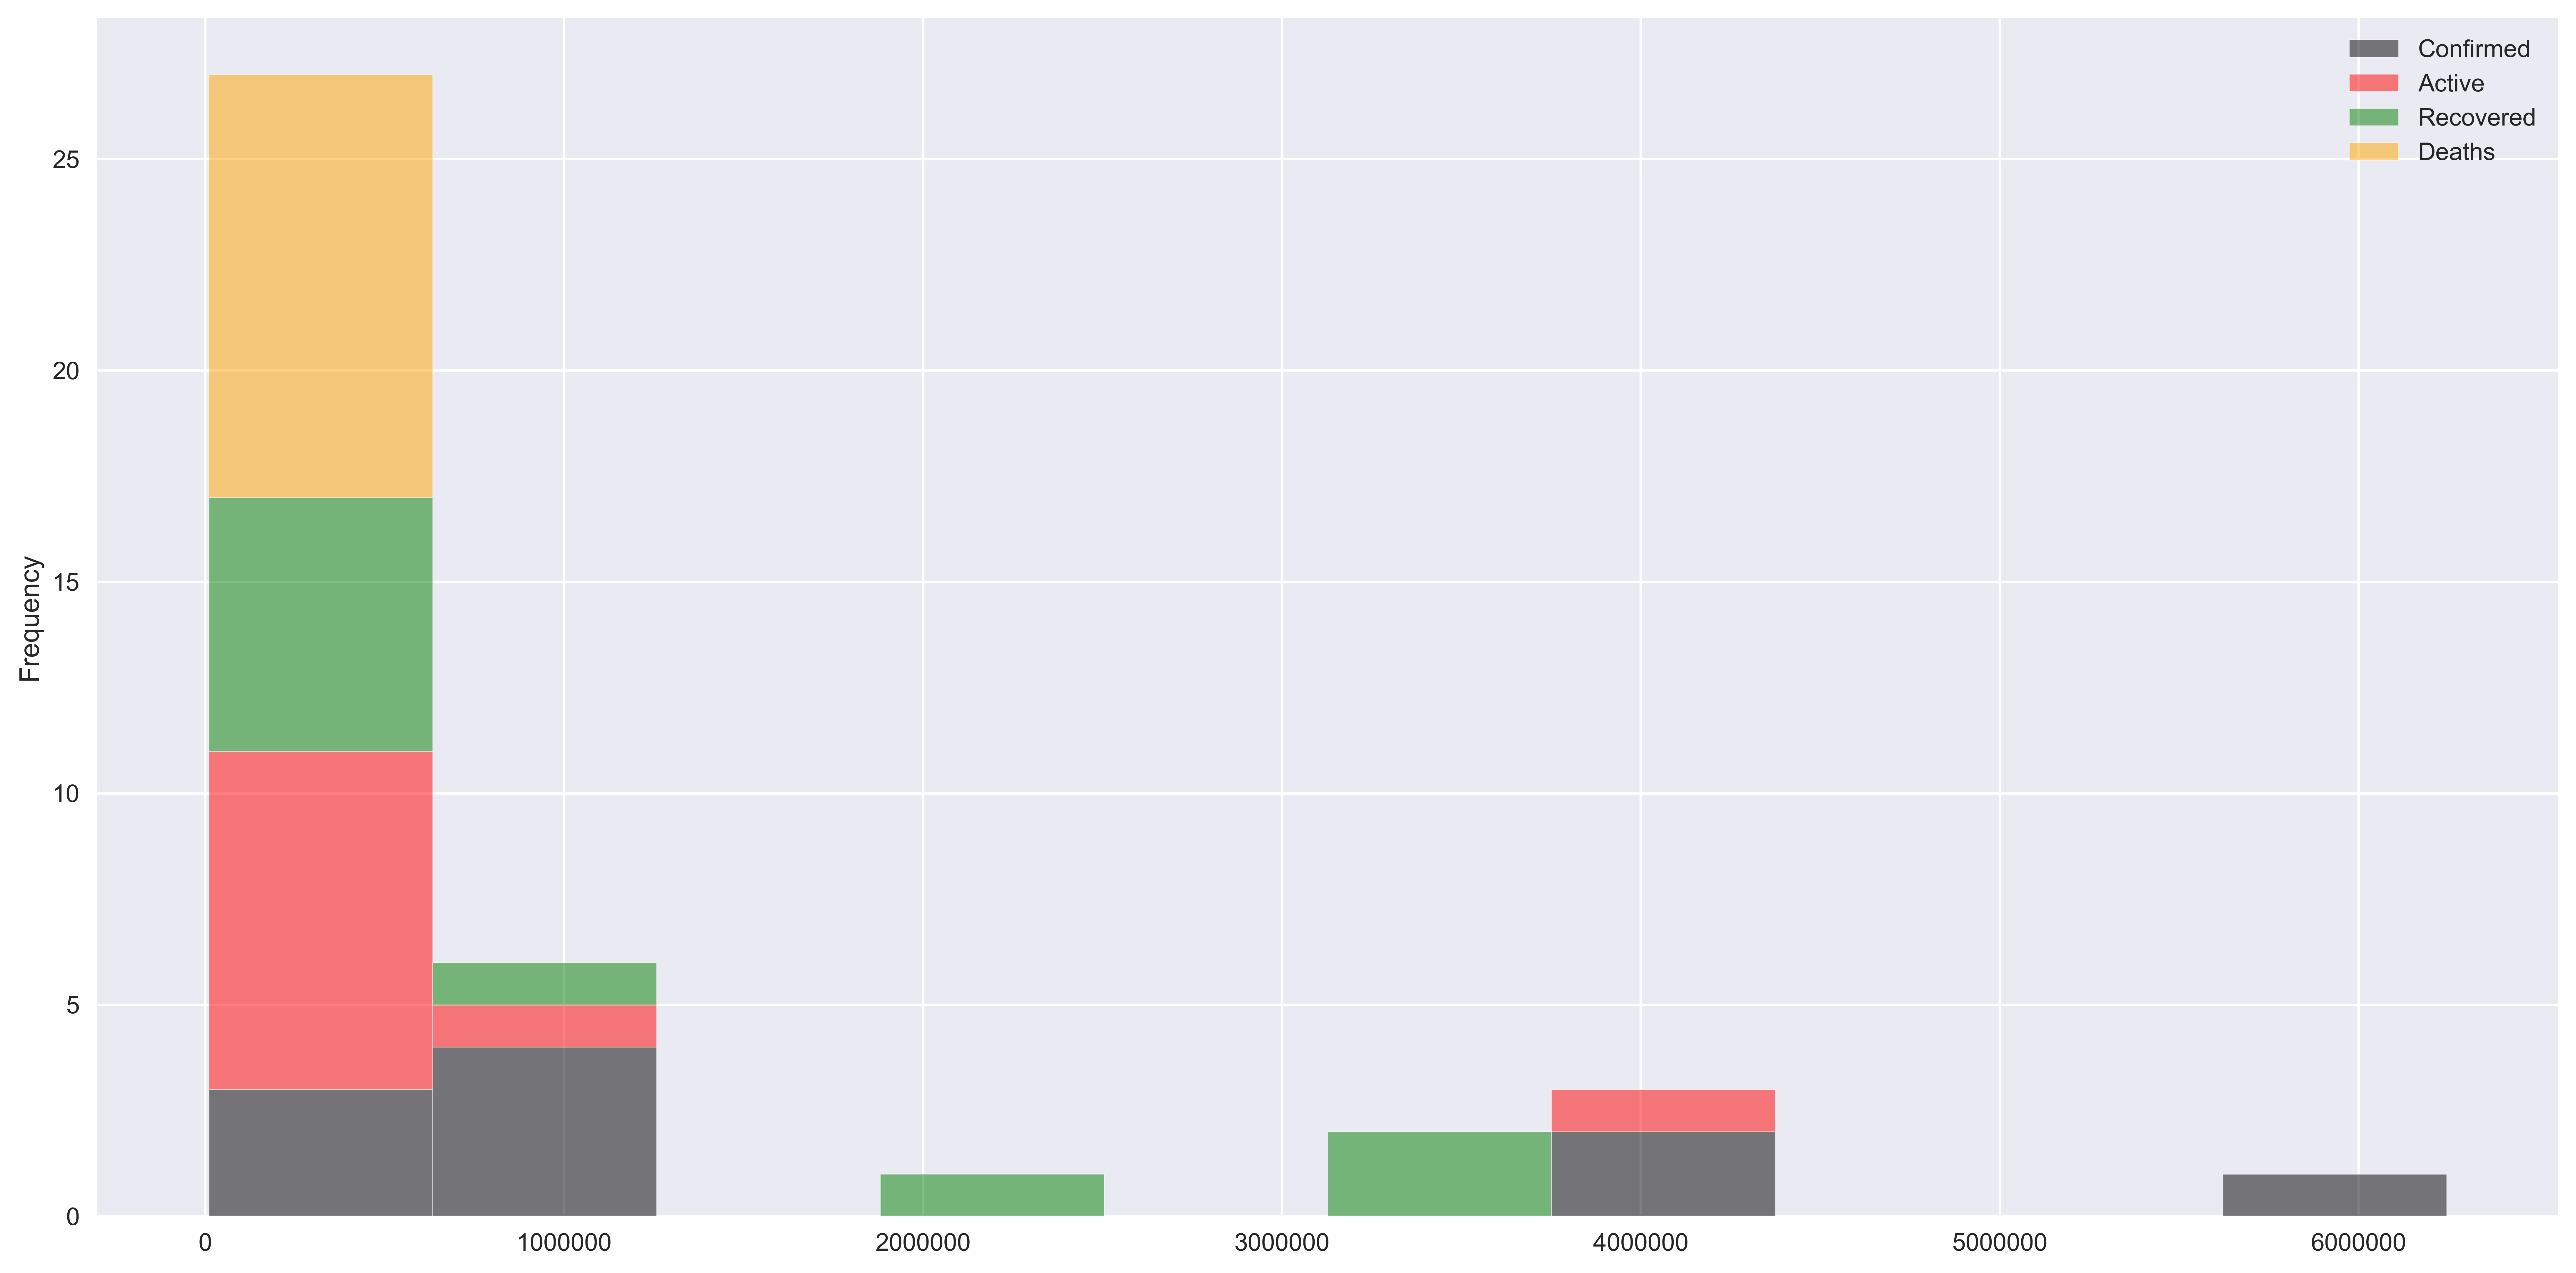

In [32]:
# Histogram plot top countries
df_countries_top.plot(kind='hist', figsize=(18, 9),stacked=True, 
             alpha=0.5,
            color=['black', 'red', 'green', 'orange']) 
plt.show()